<a href="https://colab.research.google.com/github/alexapruiz/Projetos/blob/master/WordCloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install wordcloud -q

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# importar o arquivo csv em um df
df = pd.read_csv('http://dl.dropboxusercontent.com/s/fdzigk974zbx2de/listings.csv?dl=0')

# eliminar as colunas com valores ausentes
summary = df.dropna(subset=['summary'], axis=0)['summary']


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (61,62,94) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [26]:
# exemplos de descrições para os imóveis no Airbnb
display(summary.iloc[100])
display(summary.iloc[120])
display(summary.iloc[133])

'Ambiente tranquilo e familiar,ótimo para viajantes que no final do dia queiram descansar e ter uma noite tranquila. Excelente bairro que fica próximo a Lagoa Rodrigo de Freitas, que é um dos lindos cartões postais de nossa cidade. Aguardo você!'

'O quarto é lindo e bem grande e possui acesso para a varanda do apartamento. Possui grandes armários,  bancada. Esse é o quarto maior de um apartamento/cobertura de 150m2 que possui 3 quartos, sala, varandas em torno de todo o apartamento, cozinha ampla com dependências. Esse quarto não possui banheiro privativo. Os hospedes desse quarto compartilham o banheiro com as pessoas que estiverem utilizando o segundo quarto. O terceiro quarto é a suíte que normalmente é utilizada por mim e meu marido.'

'Aconchegante, amplo, básico, arejado, iluminado com luz natural em prédio seguro e familiar. Prédio com portaria 24 horas e cameras de segurança em todos os andares do edifício. Tudo isto em Copacabana a quase 1 quadra do mar! É o segundo prédio da segunda quadra da praia!!! Está localizado na Av. Prado Junior quase esquina com Av. N.Sra de Copacabana!'

In [28]:
# concatenar as palavras
all_summary = " ".join(s for s in summary)

# ver quantidade de palavras
print("Quantidade de Palavras: {}".format(len(all_summary)))

Quantidade de Palavras: 9823645


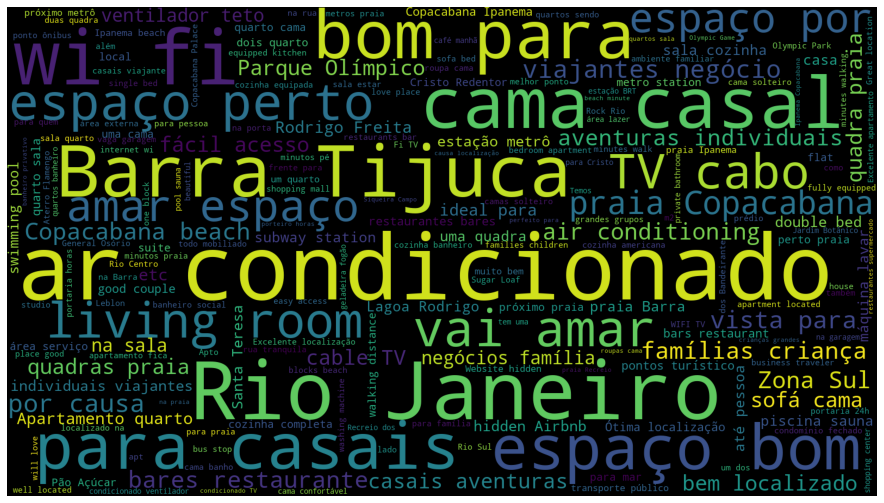

In [29]:
# lista de stopword
stopwords = set(STOPWORDS)
stopwords.update(["da", "meu", "em", "você", "de", "ao", "os"])

# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1600, height=900).generate(all_summary)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(16,9))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud);
wordcloud.to_file("airbnb_summary_wordcloud.png")

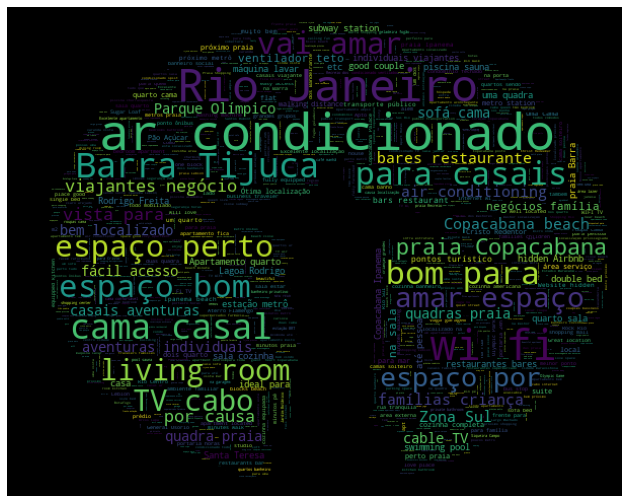

In [34]:
# endereço LOCAL da SUA imagem
rio_mask = np.array(Image.open('Cristo.jpg'))
   
# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1000, height=1000, max_words=2000,
                      mask=rio_mask, max_font_size=200,
                      min_font_size=1).generate(all_summary)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(16,9))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud)
wordcloud.to_file("airbnb_summary_wordcloud.png")